In [1]:
import numpy as np
import math
import numpy.linalg as LA
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.patches as mpatches
import sympy as sp
from sympy import *
from sympy.matrices import Matrix

In [2]:
def convert_to_sympy_rationals(obj):
    """
    Recursively convert numbers, lists, or tuples to Sympy Rationals.
    If the item is a number, it uses sp.nsimplify (which returns a Rational when possible).
    """
    if isinstance(obj, (int, float)):
        return sp.nsimplify(obj)
    elif isinstance(obj, (list, tuple)):
        return type(obj)(convert_to_sympy_rationals(item) for item in obj)
    else:
        return obj

def matrix_to_sympy_matrix(mat):
    """
    Convert a nested list (matrix) into a Sympy Matrix with rational entries.
    """
    return sp.Matrix([[convert_to_sympy_rationals(item) for item in row] for row in mat])

In [2]:
def inequality1(z):
    return np.abs(1+z)

def inequality2(z):
    return np.abs(1/(1-z))

x=np.linspace(-4,4,400)
y=np.linspace(-4,4,400)
X, Y = np.meshgrid(x, y)
Z=X+1j*Y
F1=inequality1(Z)
F2=inequality2(Z)

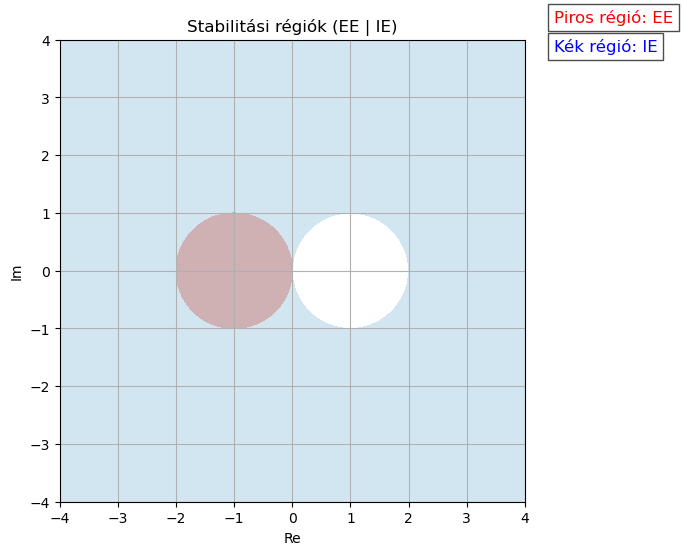

In [3]:
plt.figure(figsize=(6, 6))
plt.grid(True)
cs1=plt.contourf(X, Y, F1, levels=[0,1], cmap="Reds", alpha=0.5,)
cs2=plt.contourf(X, Y, F2, levels=[0,1], cmap="Blues", alpha=0.3)
plt.title("Stabilitási régiók (EE | IE)")
plt.text(4.5, 4.3, 'Piros régió: EE', color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
plt.text(4.5, 3.8, 'Kék régió: IE', color='blue', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()


### Adjuk meg az RK módszer stabilitási függvényét és tartományát a Butcher tabló segítségével!


In [2]:
def butcher(A: np.array, b: np.array, c: np.array, name: str ="RK"):
    """
    A Butcher tabló segítségével megadjuk az RK módszerek egyes tulajdonságait, stabilitási függvényét és stabilitási régióját
    """
    # Dimenziók vizsgálata
    if len(A)!=len(b) or len(b)!=len(c) or len(A)!=len(c):
        print(f"Hibás input")
        return

    # Confluent vizsgálat
    print("-------")
    confluent=False
    for i in range(len(c)):
        if confluent==True:
            break
        for j in range(len(c)):
            if i!=j:
                if c[i]==c[j]:
                    confluent=True
                    
    if confluent==True:
        print(f"Az RK módszer confluent")
    if confluent==False:
        print(f"Az RK módszer nem confluent")
        print(f"Ennél a módszernél az AN stabilitás ekvivalens az algebrai stabilitással")
    print("-------")

    # M és B mátrix, Algebrai stabilitás, AN stabilitás
    B=np.diag(b)
    M=(B @ A) + (np.transpose(A) @ B) - np.outer(b,np.transpose(b))
    print(f"M mátrix: \n {M}")
    neg1=len(B[B<0])
    neg2=len(M[M<0])
    if neg1 == 0 and neg2 == 0:
        print(f"Az {name} módszer algebrailag stabil")
    else:
        print(f"Az {name} módszer algebrailag nem stabil")

    if confluent == False and neg1+neg2 == 0:
        print(f"A {name} módszer AN stabil")
    print("-------")

    # Stabilitási függvény
    s=len(A)
    e=np.ones(s) 
    z=sp.symbols('z')
    R=sp.Function('R')
    felso=np.identity(s)-A*z+np.outer(e,b)*z
    felso=sp.Matrix(felso)
    also=np.identity(s)-A*z
    also=sp.Matrix(also)
    R=felso.det()/also.det()
    print(f"Az adott RK módszer stabilitási fv-e:")
    print(f"R(z)={str(R)}")
    print("-------")

    # Stabilitási régió plotolása

   
    custom_cmap = mcolors.ListedColormap(["lightblue"])

    inequality=sp.Eq(R,1)
    inequality=sp.lambdify((z),np.abs(R))
    x=np.linspace(-4,4,500)
    y=np.linspace(-4,4,500)
    X, Y = np.meshgrid(x, y)
    Z=X+1j*Y
    F1=inequality(Z)

    plt.figure(figsize=(6, 6), dpi=150)
    plt.axhline(0, color='black', linewidth=1, zorder=1)
    plt.axvline(0, color='black', linewidth=1, zorder=1)
    plt.contourf(X, Y, F1, levels=[-1,1], cmap=custom_cmap, alpha=1, zorder=1)
    plt.contour(X, Y, F1, levels=[-1,1], cmap=custom_cmap, alpha=1, zorder=1)
    plt.grid(True)
    plt.xlabel(f"Re "+r"$z$")
    plt.ylabel(f"Im "+r"$z$")
    # plt.title(f"{name} módszer stabilitási régiója")
    plt.show()
    
    return 

-------
Az RK módszer nem confluent
Ennél a módszernél az AN stabilitás ekvivalens az algebrai stabilitással
-------
M mátrix: 
 [[-1]]
Az EE módszer algebrailag nem stabil
-------
Az adott RK módszer stabilitási fv-e:
R(z)=1.0*z + 1.0
-------


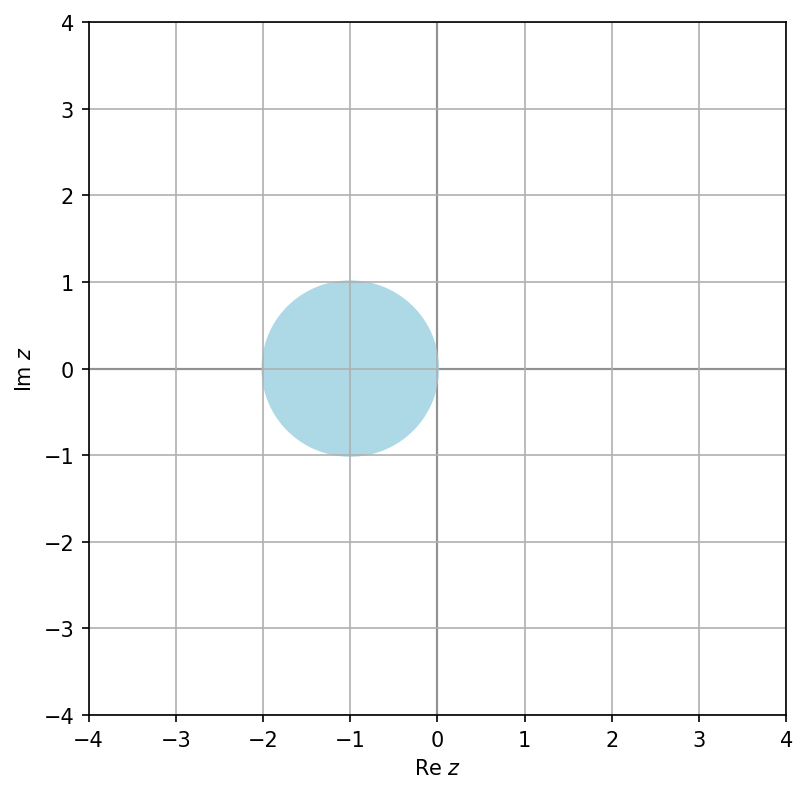

In [11]:
# EE

A=np.array([
        [0],
])
b=np.array([1])
c=np.array([0])

butcher(A,b,c,"EE")

-------
Az RK módszer nem confluent
Ennél a módszernél az AN stabilitás ekvivalens az algebrai stabilitással
-------
M mátrix: 
 [[1]]
Az IE módszer algebrailag stabil
A IE módszer AN stabil
-------
Az adott RK módszer stabilitási fv-e:
R(z)=1.0/(1.0 - z)
-------


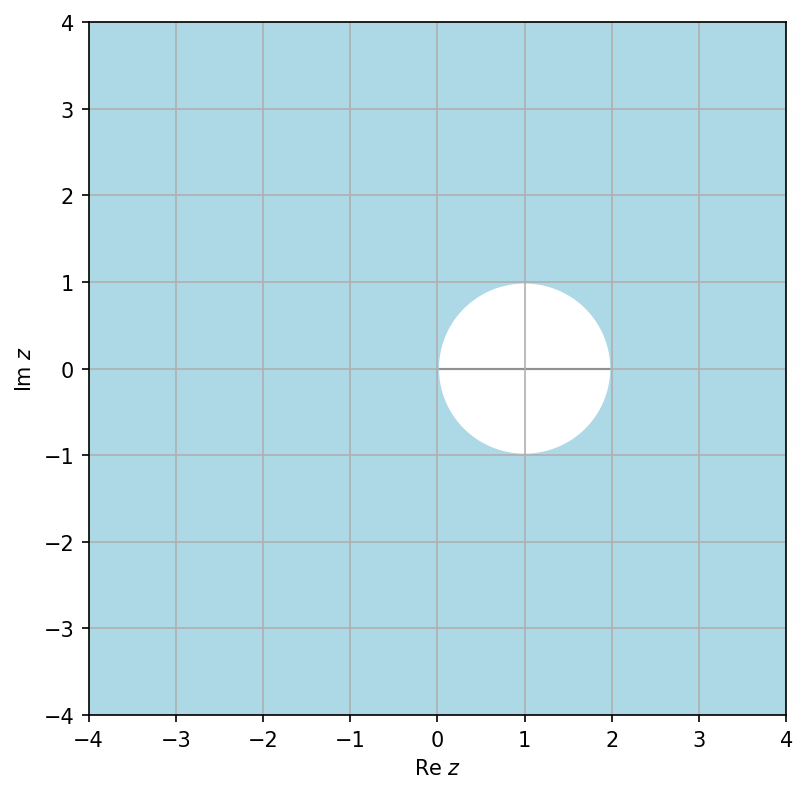

In [12]:
# IE

A=np.array([
        [1],
])
b=np.array([1])
c=np.array([1])

butcher(A,b,c,"IE")

-------
Az RK módszer nem confluent
Ennél a módszernél az AN stabilitás ekvivalens az algebrai stabilitással
-------
M mátrix: 
 [[1]]
Az Radau IA s=1 módszer algebrailag stabil
A Radau IA s=1 módszer AN stabil
-------
Az adott RK módszer stabilitási fv-e:
R(z)=1.0/(1.0 - z)
-------


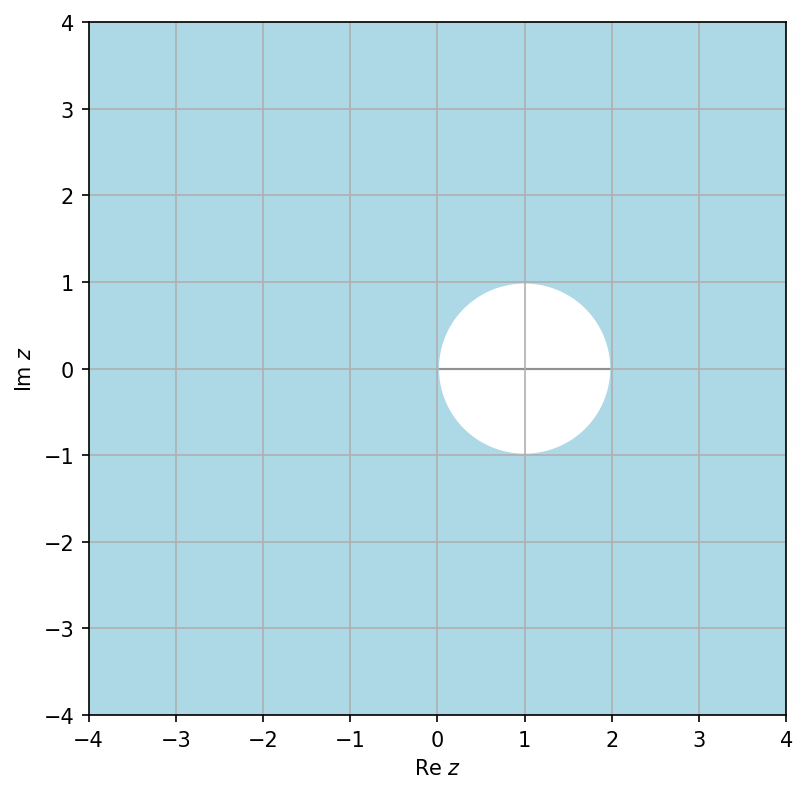

In [3]:
# Radau IA s=1
A=np.array([
        [1],
])
b=np.array([1])
c=np.array([0])

butcher(A,b,c,"Radau IA s=1")

-------
Az RK módszer nem confluent
Ennél a módszernél az AN stabilitás ekvivalens az algebrai stabilitással
-------
M mátrix: 
 [[0.]]
Az Implicit középponti módszer algebrailag stabil
A Implicit középponti módszer AN stabil
-------
Az adott RK módszer stabilitási fv-e:
R(z)=(0.5*z + 1.0)/(1.0 - 0.5*z)
-------


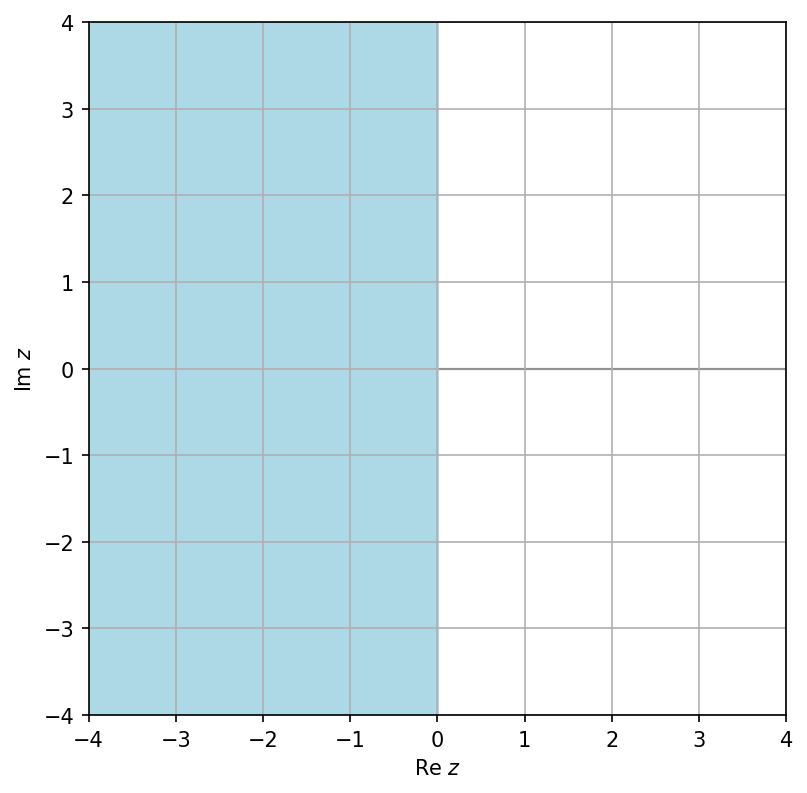

In [13]:
# Implicit középponti

A=np.array([
        [1/2],
])
b=np.array([1])
c=np.array([1/2])

butcher(A,b,c,"Implicit középponti")

-------
Az RK módszer nem confluent
Ennél a módszernél az AN stabilitás ekvivalens az algebrai stabilitással
-------
M mátrix: 
 [[-0.125  0.   ]
 [ 0.     0.125]]
Az 2STRK módszer algebrailag nem stabil
-------
Az adott RK módszer stabilitási fv-e:
R(z)=(0.5*z + 1.0)/(1.0 - 0.5*z)
-------


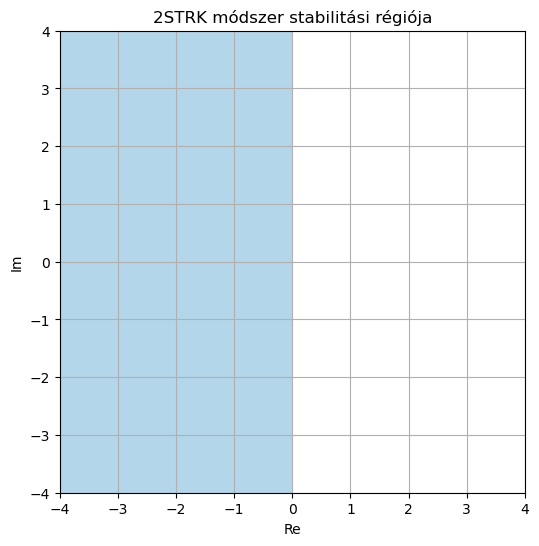

In [8]:
# 2STRK 2 lépéses A stabil RK módszer

A=np.array([
        [1/8,1/8],
        [3/8,3/8],
])
b=np.array([1/2,1/2])
c=np.array([1/4,3/4])

butcher(A,b,c,"2STRK")

-------
Az RK módszer nem confluent
Ennél a módszernél az AN stabilitás ekvivalens az algebrai stabilitással
-------
M mátrix: 
 [[-0.25  0.25]
 [ 0.25 -0.25]]
Az RK2 módszer algebrailag nem stabil
-------
Az adott RK módszer stabilitási fv-e:
R(z)=0.5*z**2 + 1.0*z + 1.0
-------


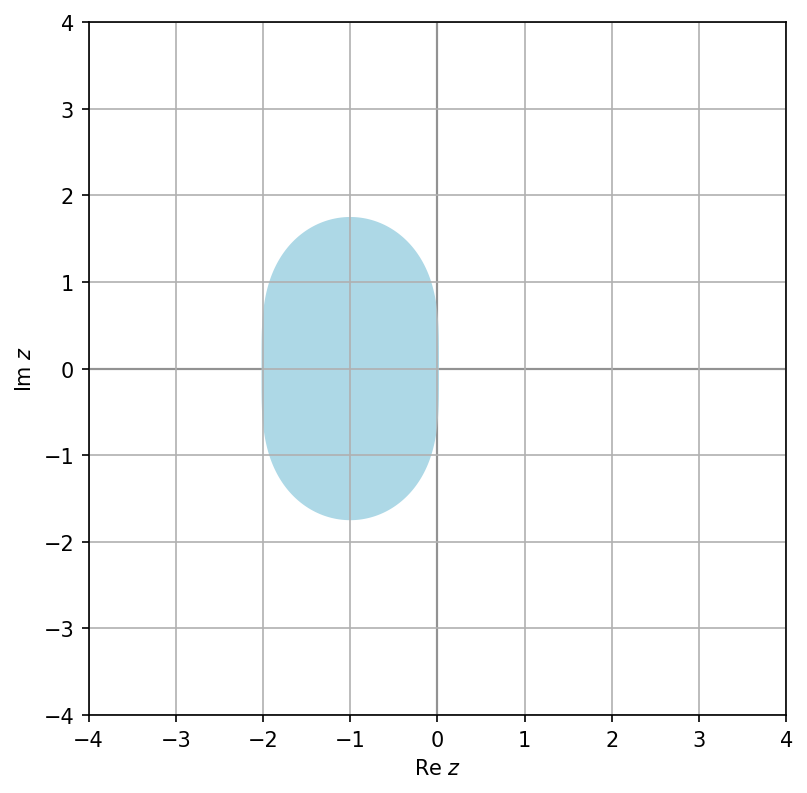

In [14]:
# RK2

A=np.array([
        [0,0],
        [1,0],
])
b=np.array([1/2,1/2])
c=np.array([0,1])

butcher(A,b,c,"RK2")

-------
Az RK módszer nem confluent
Ennél a módszernél az AN stabilitás ekvivalens az algebrai stabilitással
-------
M mátrix: 
 [[ 0.0625 -0.0625]
 [-0.0625  0.0625]]
Az Radau IA s=2 módszer algebrailag nem stabil
-------
Az adott RK módszer stabilitási fv-e:
R(z)=(0.333333333333333*z + 1.0)/(0.166666666666667*z**2 - 0.666666666666667*z + 1.0)
-------


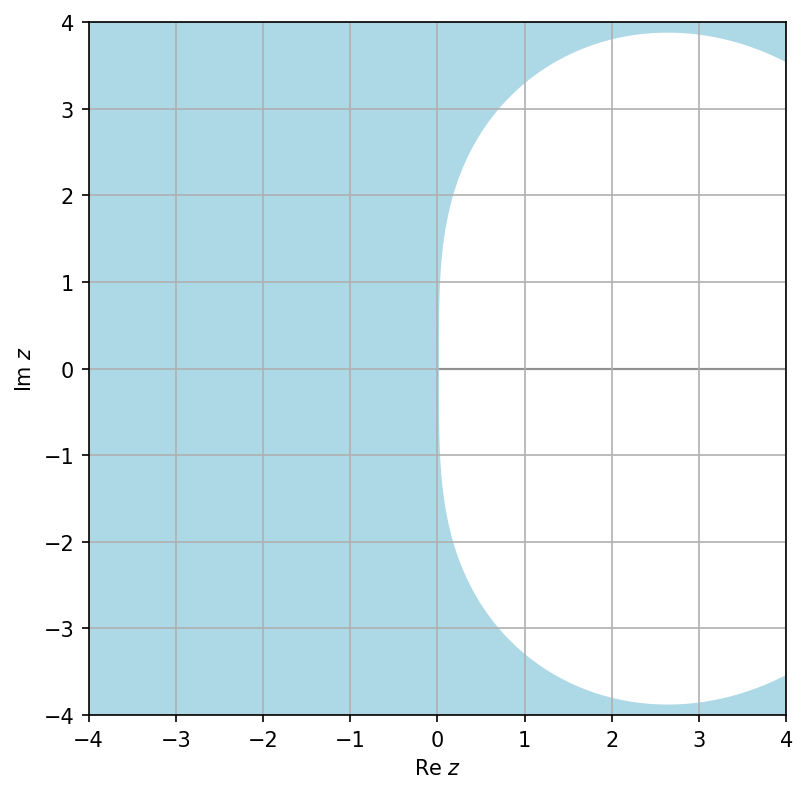

In [4]:
# Radau IA s=2

A=np.array([
        [1/4,-1/4],
        [1/4,5/12],
])
b=np.array([1/4,3/4])
c=np.array([0,2/3])

butcher(A,b,c,"Radau IA s=2")

-------
Az RK módszer nem confluent
Ennél a módszernél az AN stabilitás ekvivalens az algebrai stabilitással
-------
M mátrix: 
 [[-0.02777778  0.22222222 -0.19444444]
 [ 0.22222222 -0.44444444  0.22222222]
 [-0.19444444  0.22222222 -0.02777778]]
Az RK3 módszer algebrailag nem stabil
-------
Az adott RK módszer stabilitási fv-e:
R(z)=0.166666666666667*z**3 + 0.5*z**2 + 1.0*z + 1.0
-------


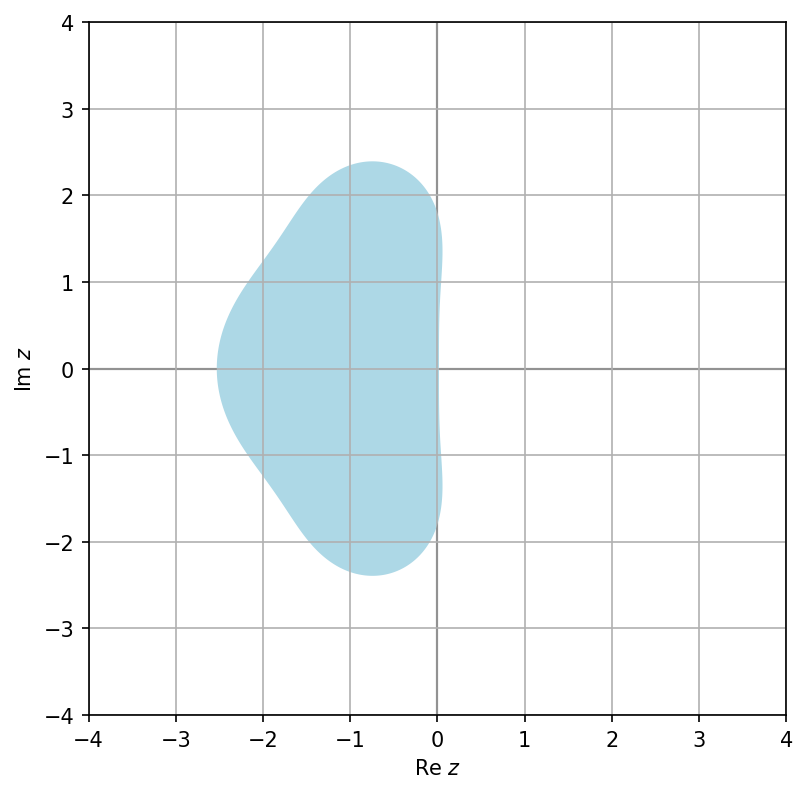

In [15]:
# RK3

A=np.array([
        [0,0,0],
        [1/2,0,0],
        [-1,2,0],
])
b=np.array([1/6,2/3,1/6])
c=np.array([0,1/2,1])

butcher(A,b,c,"RK3")

-------
Az RK módszer confluent
-------
M mátrix: 
 [[-0.02777778  0.11111111 -0.05555556 -0.02777778]
 [ 0.11111111 -0.11111111  0.05555556 -0.05555556]
 [-0.05555556  0.05555556 -0.11111111  0.11111111]
 [-0.02777778 -0.05555556  0.11111111 -0.02777778]]
Az RK4 módszer algebrailag nem stabil
-------
Az adott RK módszer stabilitási fv-e:
R(z)=0.0416666666666667*z**4 + 0.166666666666667*z**3 + 0.5*z**2 + 1.0*z + 1.0
-------


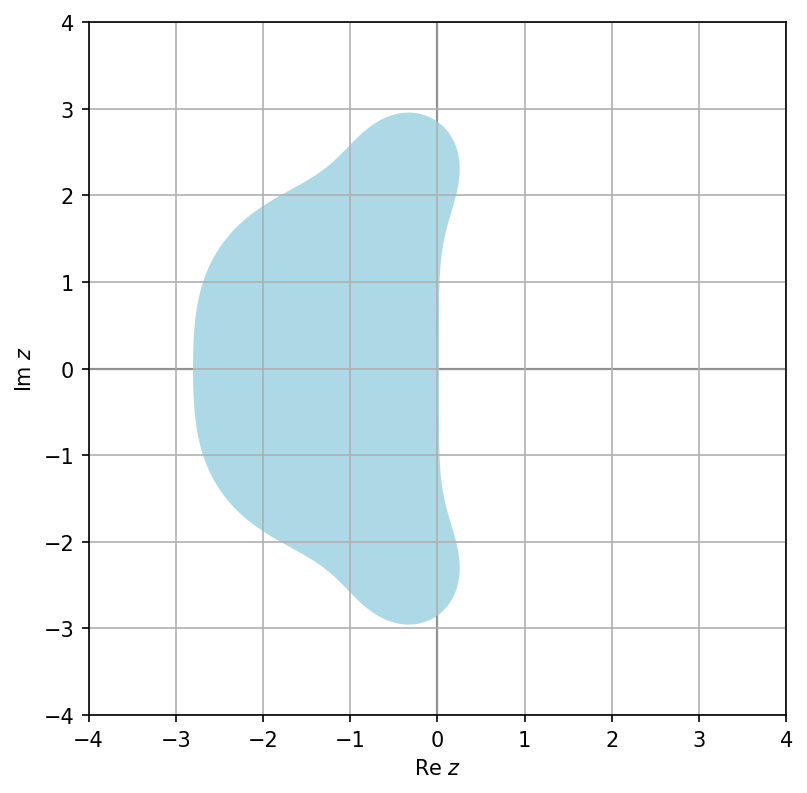

In [16]:
# RK4

A=np.array([
        [0,0,0,0],
        [1/2,0,0,0],
        [0,1/2,0,0],
        [0,0,1,0]
])
b=np.array([1/6,1/3,1/3,1/6])
c=np.array([0,1/2,1/2,1])

butcher(A,b,c,"RK4")

-------
Az RK módszer nem confluent
Ennél a módszernél az AN stabilitás ekvivalens az algebrai stabilitással
-------
M mátrix: 
 [[-0.25  0.  ]
 [ 0.    0.25]]
Az Imp. Trapéz módszer módszer algebrailag nem stabil
-------
Az adott RK módszer stabilitási fv-e:
R(z)=(0.5*z + 1.0)/(1.0 - 0.5*z)
-------


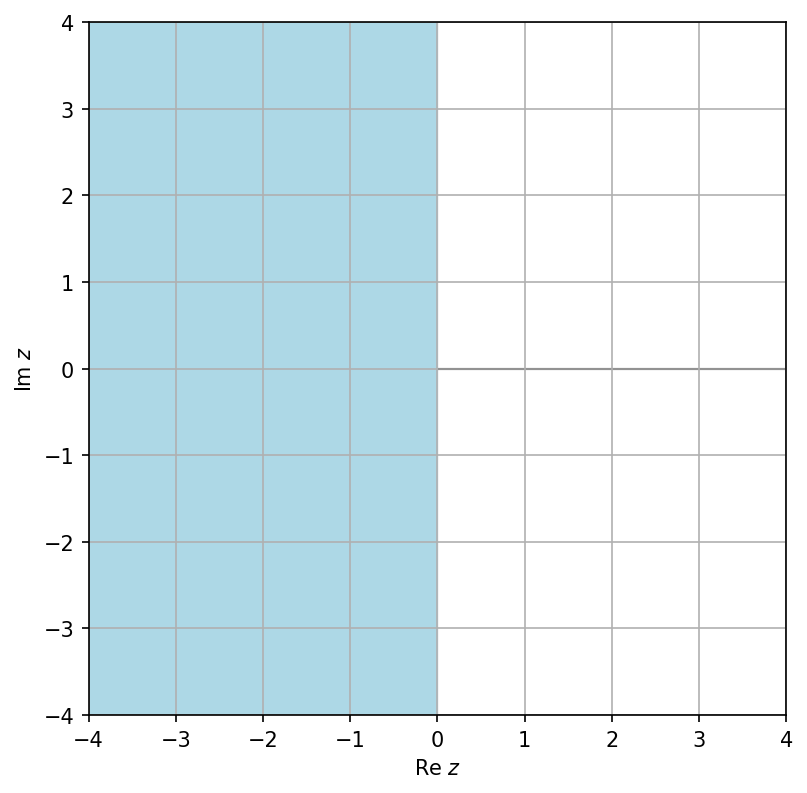

In [8]:
# Implicit trapéz módszer Crank - Nicolson

A=np.array([
        [0,0],
        [1/2,1/2],
])
b=np.array([1/2,1/2])
c=np.array([0,1])

butcher(A,b,c,"Imp. Trapéz módszer")

In [4]:
def stab_fv(A, b, c, dim: int):
    s=dim
    e=np.ones(s) 
    z=sp.symbols('z')
    R=sp.Function('R')
    felso=np.identity(s)-A*z+np.outer(e,b)*z
    felso=sp.Matrix(felso)
    also=np.identity(s)-A*z
    also=sp.Matrix(also)
    R=felso.det()/also.det()
    print(f"Az adott RK módszer stabilitási fv-e:")
    print(f"R(z)={str(R)}")
    return


In [5]:
a=sp.symbols('a')
A=np.array([
        [0,0],
        [1-a,a],
])
b=np.array([1-a,a])
c=np.array([0,1])

stab_fv(A,b,c, 2)

Az adott RK módszer stabilitási fv-e:
R(z)=(-1.0*a*z + 1.0*z + 1.0)/(-1.0*a*z + 1.0)


# RK stabilitási régiók egy ábrán

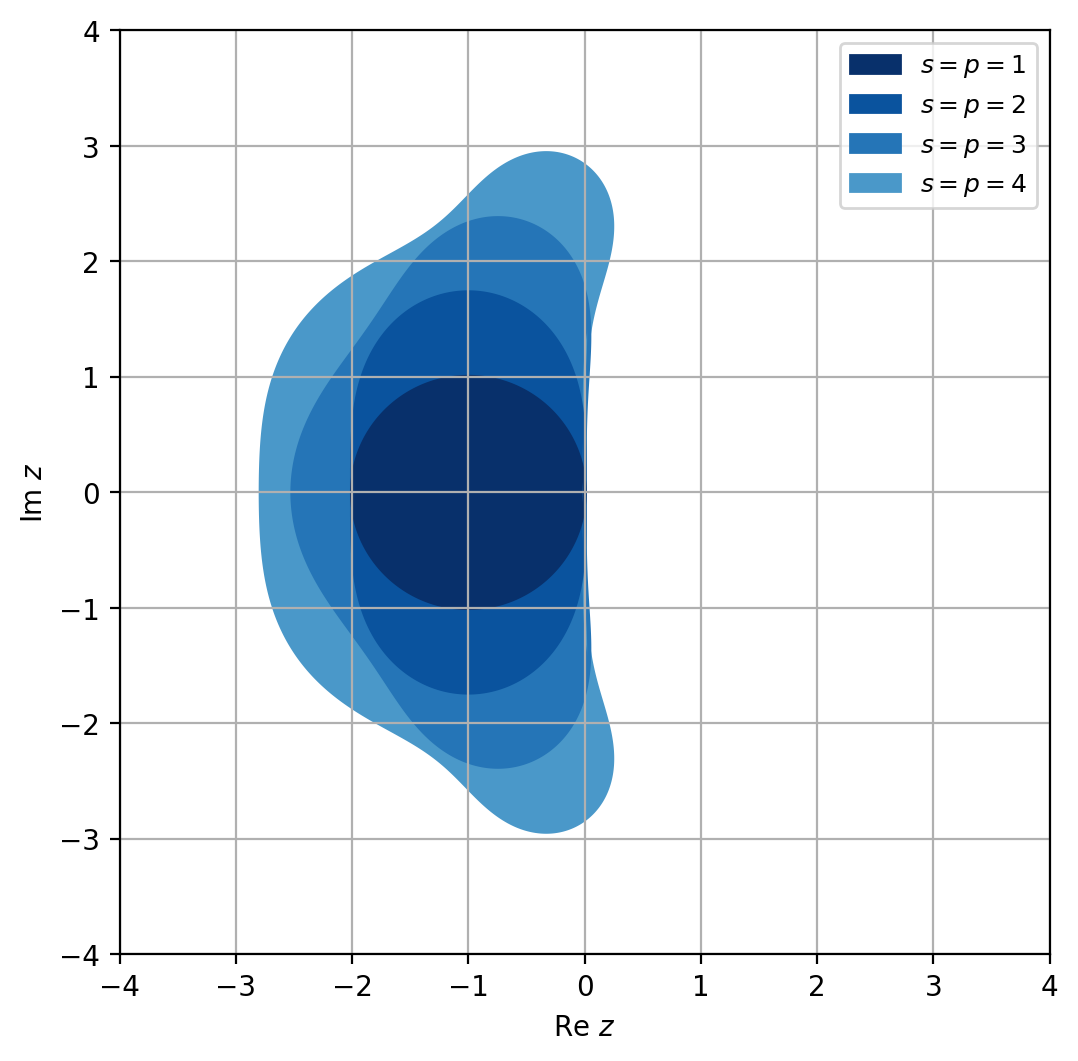

In [9]:
fig, ax = plt.subplots(figsize=(6,6),dpi=200)

z=sp.symbols('z')
R_func=[1+z,1+z+z**2/2,1+z+z**2/2+z**3/6,1+z+z**2/2+z**3/6+z**4/24]
colormap = plt.cm.Blues
pos=np.linspace(0.6,1,4)

for i in range(1,5):
    
    R=sp.Function('R')
    R=list(reversed(R_func))[i-1]
    inequality=sp.Eq(R,1)
    inequality=sp.lambdify((z),np.abs(R))
    x=np.linspace(-4,4,800)
    y=np.linspace(-4,4,800)
    X, Y = np.meshgrid(x, y)
    Z=X+1j*Y
    F1=inequality(Z)
    color = mcolors.to_hex(colormap(pos[i-1]))
    color=mcolors.ListedColormap([f"{color}"])
    plt.contourf(X, Y, F1, levels=[-1,1], cmap=color, alpha=1, zorder=0)
    plt.contour(X, Y, F1, levels=[-1,1], cmap=color, alpha=1, zorder=1)

legend_elements=[mpatches.Patch(color=colormap(pos[3]), label=r"$s=p=1$"),
                 mpatches.Patch(color=colormap(pos[2]), label=r"$s=p=2$"),
                 mpatches.Patch(color=colormap(pos[1]), label=r"$s=p=3$"),
                 mpatches.Patch(color=colormap(pos[0]), label=r"$s=p=4$")]
plt.legend(handles=legend_elements, fontsize=9)
plt.grid(True)
plt.xlabel(f"Re "+r"$z$")
plt.ylabel(f"Im "+r"$z$")
plt.show()

Az adott RK módszer stabilitási fv-e:
  6      5    4    3    2        
 z      z    z    z    z         
──── + ─── + ── + ── + ── + z + 1
1280   120   24   6    2         


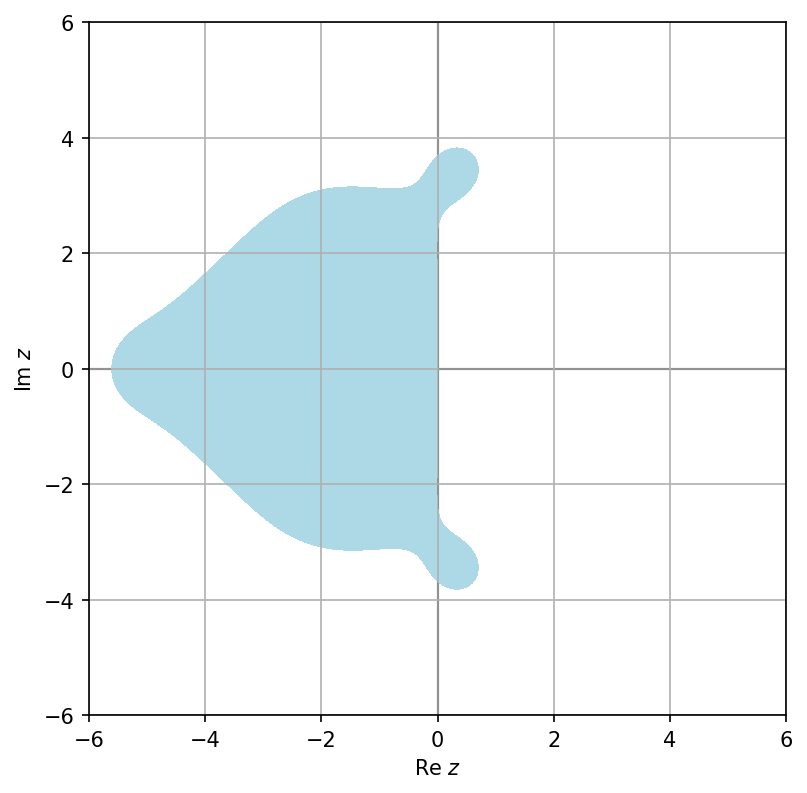

In [2]:
# Butcher RK5

z = sp.symbols('z')

A = sp.Matrix([
    [Rational(0),    Rational(0),    Rational(0),    Rational(0),    Rational(0),    Rational(0)],
    [Rational(1,4),  Rational(0),    Rational(0),    Rational(0),    Rational(0),    Rational(0)],
    [Rational(1,8),  Rational(1,8),  Rational(0),    Rational(0),    Rational(0),    Rational(0)],
    [Rational(0),    Rational(0),    Rational(1,2),  Rational(0),    Rational(0),    Rational(0)],
    [Rational(3,16), Rational(-3,8), Rational(3,8),  Rational(9,16), Rational(0),    Rational(0)],
    [Rational(-3,7), Rational(8,7),   Rational(6,7), Rational(-12,7), Rational(8,7), Rational(0)]
])

b = sp.Matrix([
    Rational(7,90),
    Rational(0),
    Rational(32,90),
    Rational(12,90),
    Rational(32,90),
    Rational(7,90)
])

c = sp.Matrix([
    Rational(0),
    Rational(1,4),
    Rational(1,4),
    Rational(1,2),
    Rational(3,4),
    Rational(1,1)
])

s = b.rows  

e = sp.ones(s, 1)

felso = sp.eye(s) - z*A + z*(e * b.T)
also = sp.eye(s) - z*A

RRK5 = sp.simplify(felso.det() / also.det())

print("Az adott RK módszer stabilitási fv-e:")
sp.pprint(RRK5)

custom_cmap = mcolors.ListedColormap(["lightblue"])

inequality=sp.Eq(RRK5,1)
inequality=sp.lambdify((z),np.abs(RRK5))
x=np.linspace(-6,6,500)
y=np.linspace(-6,6,500)
X, Y = np.meshgrid(x, y)
Z=X+1j*Y
F1=inequality(Z)

plt.figure(figsize=(6, 6), dpi=150)
plt.axhline(0, color='black', linewidth=1, zorder=1)
plt.axvline(0, color='black', linewidth=1, zorder=1)
plt.contourf(X, Y, F1, levels=[-1,1], cmap=custom_cmap, alpha=1, zorder=1)
plt.grid(True)
plt.xlabel(f"Re "+r"$z$")
plt.ylabel(f"Im "+r"$z$")
# plt.title(f"{name} módszer stabilitási régiója")
plt.show()

Az adott RK módszer stabilitási fv-e:
  5    4    3    2        
 z    z    z    z         
─── + ── + ── + ── + z + 1
120   24   6    2         


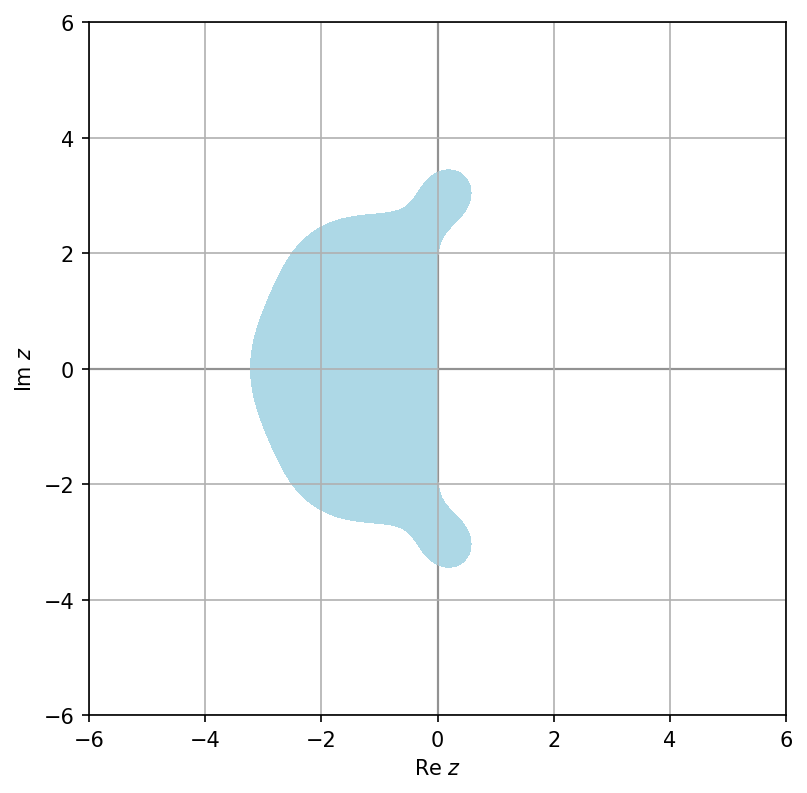

In [3]:
# Nystörm 5-rendű módszer

z = sp.symbols('z')

A= sp.Matrix([
    [Rational(0),    Rational(0),    Rational(0),    Rational(0),    Rational(0),    Rational(0)],
    [Rational(1,3),  Rational(0),    Rational(0),    Rational(0),    Rational(0),    Rational(0)],
    [Rational(4,25), Rational(6,25),  Rational(0),    Rational(0),    Rational(0),    Rational(0)],
    [Rational(1,4),  Rational(-3),    Rational(15,4),  Rational(0),    Rational(0),    Rational(0)],
    [Rational(2,27), Rational(10,9), Rational(-50,81),  Rational(8,81), Rational(0),    Rational(0)],
    [Rational(2,25), Rational(12,25),   Rational(2,15), Rational(8,75), Rational(0), Rational(0)]
])

b = sp.Matrix([
    Rational(23,192),
    Rational(0),
    Rational(125,192),
    Rational(0),
    Rational(-27,64),
    Rational(125,192)
])

c = sp.Matrix([
    Rational(0),
    Rational(1,3),
    Rational(2,5),
    Rational(1),
    Rational(2,3),
    Rational(4,5)
])

s = b.rows  

e = sp.ones(s, 1)

felso = sp.eye(s) - z*A + z*(e * b.T)
also = sp.eye(s) - z*A

RN = sp.simplify(felso.det() / also.det())

print("Az adott RK módszer stabilitási fv-e:")
sp.pprint(RN)

custom_cmap = mcolors.ListedColormap(["lightblue"])

inequality=sp.Eq(RN,1)
inequality=sp.lambdify((z),np.abs(RN))
x=np.linspace(-6,6,500)
y=np.linspace(-6,6,500)
X, Y = np.meshgrid(x, y)
Z=X+1j*Y
F1=inequality(Z)

plt.figure(figsize=(6, 6), dpi=150)
plt.axhline(0, color='black', linewidth=1, zorder=1)
plt.axvline(0, color='black', linewidth=1, zorder=1)
plt.contourf(X, Y, F1, levels=[-1,1], cmap=custom_cmap, alpha=1, zorder=1)
plt.grid(True)
plt.xlabel(f"Re "+r"$z$")
plt.ylabel(f"Im "+r"$z$")
# plt.title(f"{name} módszer stabilitási régiója")
plt.show()

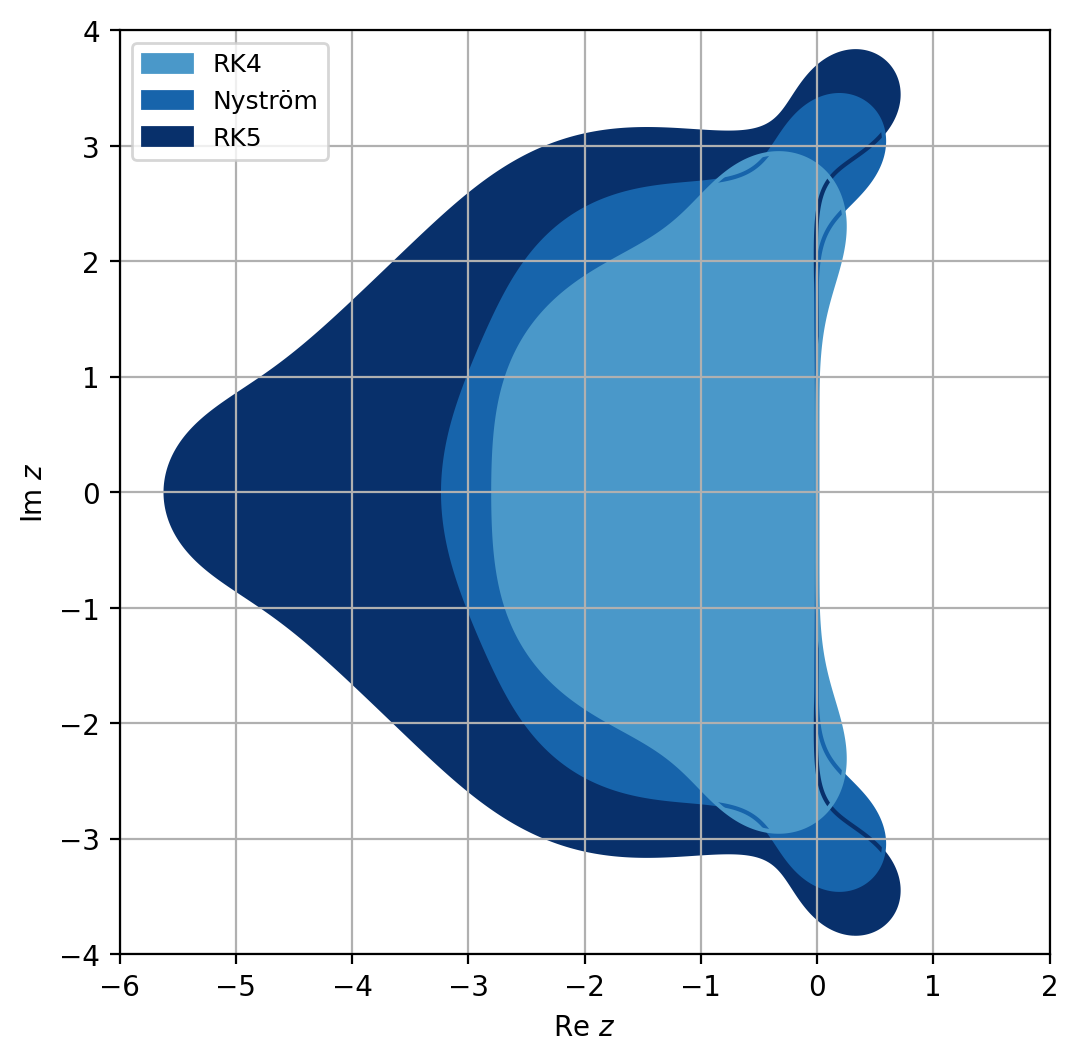

In [4]:
R4=1+z+z**2/2+z**3/6+z**4/24

R_funcs=[RRK5,RN,R4]

plt.figure(figsize=(6, 6), dpi=200)

colormap = plt.cm.Blues
pos=list(reversed(np.linspace(0.6,1,3)))

for i in range(1,4):
    R=sp.Function('R')
    R=R_funcs[i-1]
    inequality=sp.Eq(R,1)
    inequality=sp.lambdify((z),np.abs(R))
    x=np.linspace(-6,2,800)
    y=np.linspace(-4,4,800)
    X, Y = np.meshgrid(x, y)
    Z=X+1j*Y
    F1=inequality(Z)
    color = mcolors.to_hex(colormap(pos[i-1]))
    color=mcolors.ListedColormap([f"{color}"])
    plt.contour(X, Y, F1, levels=[-1,1], cmap=color, alpha=1, zorder=1)
    plt.contourf(X, Y, F1, levels=[-1,1], cmap=color, alpha=1, zorder=0)

legend_elements=[mpatches.Patch(color=colormap(pos[2]), label=f"RK4"),
                 mpatches.Patch(color=colormap(pos[1]), label=f"Nyström"),
                 mpatches.Patch(color=colormap(pos[0]), label=f"RK5")]
plt.legend(handles=legend_elements, fontsize=9,loc="upper left")
plt.grid(True)
plt.xticks([-6+i for i in range(11)])
plt.xlim(-6,2)
plt.xlabel(f"Re "+r"$z$")
plt.ylabel(f"Im "+r"$z$")
plt.show()

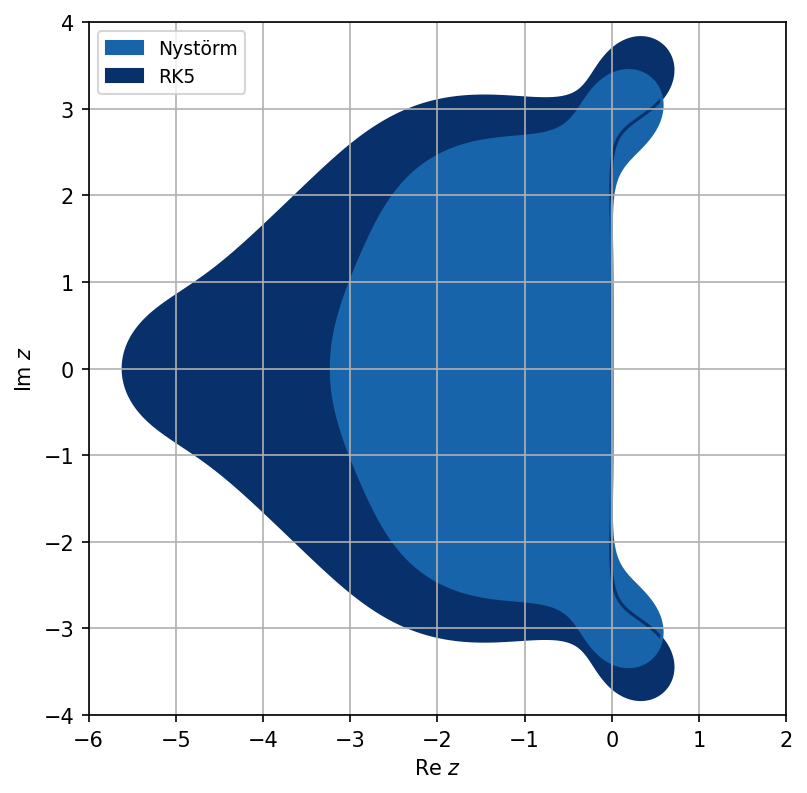

In [40]:
R_funcs=[RRK5,RN]

plt.figure(figsize=(6, 6), dpi=150)

colormap = plt.cm.Blues
pos=list(reversed(np.linspace(0.6,1,3)))

for i in range(1,3):
    R=sp.Function('R')
    R=R_funcs[i-1]
    inequality=sp.Eq(R,1)
    inequality=sp.lambdify((z),np.abs(R))
    x=np.linspace(-6,2,800)
    y=np.linspace(-4,4,800)
    X, Y = np.meshgrid(x, y)
    Z=X+1j*Y
    F1=inequality(Z)
    color = mcolors.to_hex(colormap(pos[i-1]))
    color=mcolors.ListedColormap([f"{color}"])
    plt.contour(X, Y, F1, levels=[-1,1], cmap=color, alpha=1, zorder=1)
    plt.contourf(X, Y, F1, levels=[-1,1], cmap=color, alpha=1, zorder=0)

legend_elements=[mpatches.Patch(color=colormap(pos[1]), label=f"Nystörm"),
                 mpatches.Patch(color=colormap(pos[0]), label=f"RK5")]
plt.legend(handles=legend_elements, fontsize=9,loc="upper left")
plt.grid(True)
plt.xticks([-6+i for i in range(11)])
plt.xlim(-6,2)
plt.xlabel(f"Re "+r"$z$")
plt.ylabel(f"Im "+r"$z$")
plt.show()

# Padé-approximáció

In [3]:
def e_pade(l,m):
    z=sp.symbols("z")
    R=sp.Function("R")
    felso=0
    also=0
    for i in range(l+1):
        felso+=math.factorial(l)/math.factorial(l-i)*math.factorial(l+m-i)/math.factorial(l+m)*(z**i)/math.factorial(i)
    for i in range(m+1):
        also+=math.factorial(m)/math.factorial(m-i)*math.factorial(l+m-i)/math.factorial(l+m)*((-z)**i)/math.factorial(i)
    R=felso/also

    return R

In [5]:
Radau_s1=e_pade(0,1)
Radau_s2=e_pade(1,2)
Radau_s3=e_pade(2,3)
Radau_s4=e_pade(3,4)
radau=[Radau_s1,Radau_s2,Radau_s3,Radau_s4]

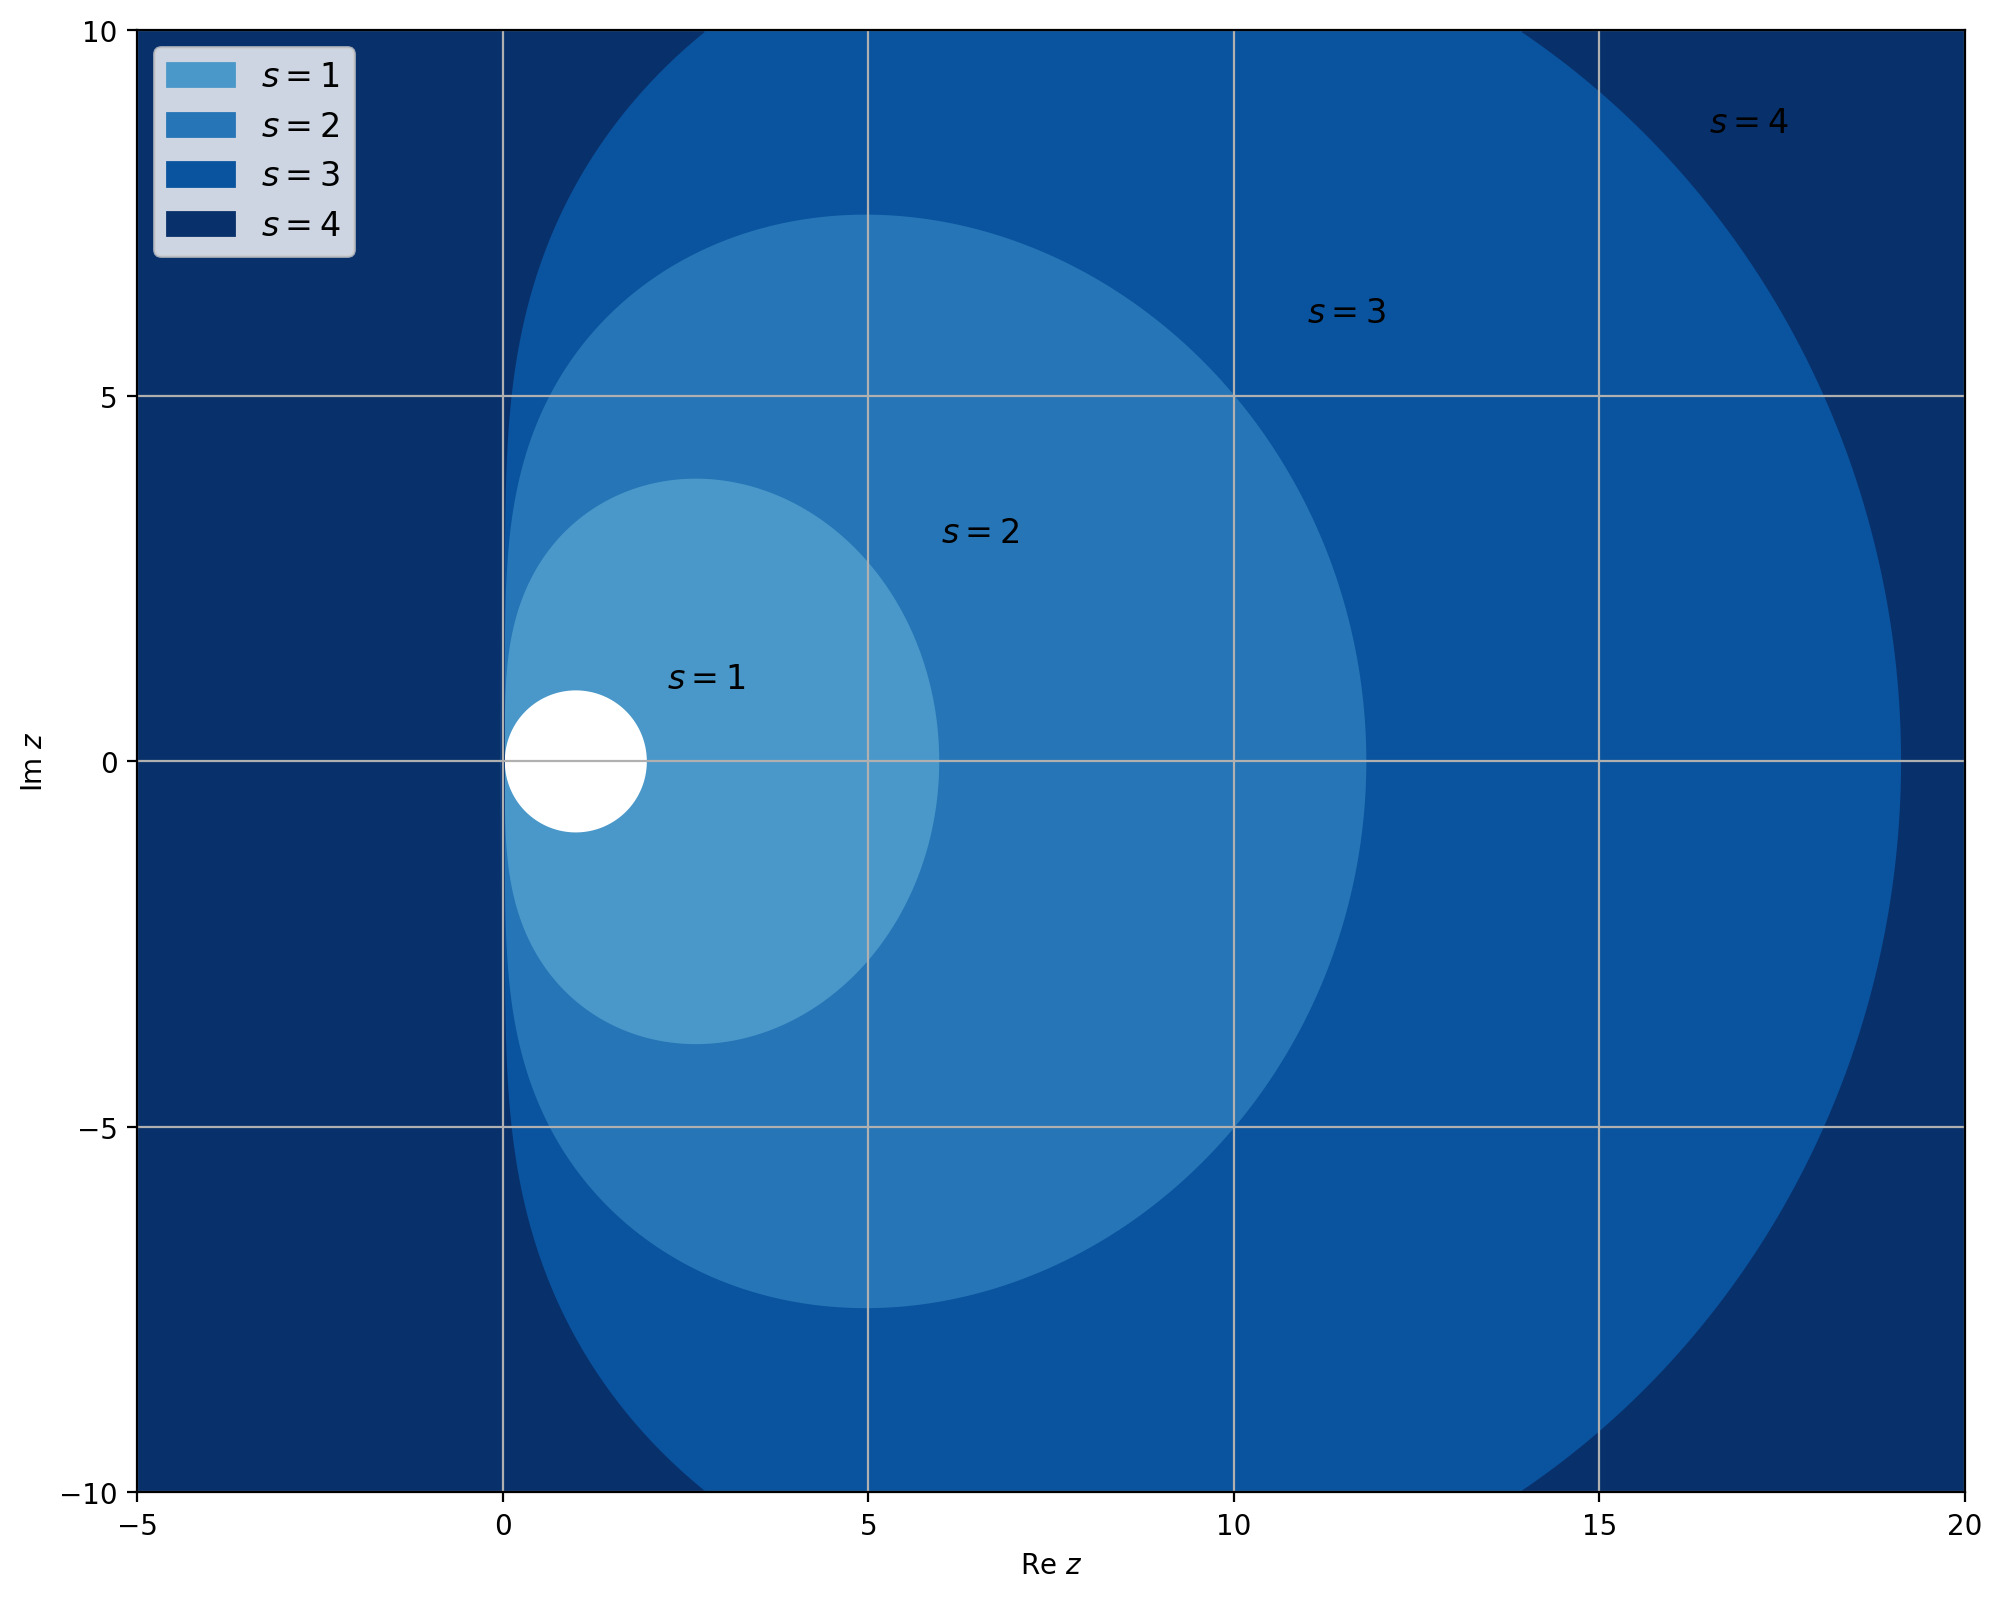

In [9]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=200)

colormap = plt.cm.Blues
pos=list(np.linspace(0.6,1,len(radau)))
z=sp.symbols("z")

for i in range(len(radau)):
    R=radau[i]
    inequality=sp.Eq(R,1)
    inequality=sp.lambdify((z),np.abs(R))
    x=np.linspace(-5,20,1200)
    y=np.linspace(-10,10,1200)
    X, Y = np.meshgrid(x, y)
    Z=X+1j*Y
    F1=inequality(Z)
    color = mcolors.to_hex(colormap(pos[i]))
    color=mcolors.ListedColormap([f"{color}"])
    plt.contour(X, Y, F1, levels=[-1,1], cmap=color, alpha=1, zorder=1)
    plt.contourf(X, Y, F1, levels=[-1,1], cmap=color, alpha=1, zorder=0)

legend_elements=[mpatches.Patch(color=colormap(pos[0]), label=r"$s=1$"),
                 mpatches.Patch(color=colormap(pos[1]), label=r"$s=2$"),
                 mpatches.Patch(color=colormap(pos[2]), label=r"$s=3$"),
                 mpatches.Patch(color=colormap(pos[3]), label=r"$s=4$")
                 ]
plt.legend(handles=legend_elements, fontsize=12,loc="upper left")

ax.text(2.25, 1, r"$s=1$", color="black", fontsize=12, zorder=len(radau))
ax.text(6, 3, r"$s=2$", color="black", fontsize=12, zorder=len(radau))
ax.text(11, 6, r"$s=3$", color="black", fontsize=12, zorder=len(radau))
ax.text(16.5, 8.6, r"$s=4$", color="black", fontsize=12, zorder=len(radau))

ax.set_aspect("equal")
fig.tight_layout()
plt.grid(True)

#2.5-ös lépés
'''plt.xticks([-5+2.5*i for i in range(11)])
plt.yticks([-10+2.5*i for i in range(9)])'''

# 5-ös lépés
plt.xticks([-5+5*i for i in range(6)])
plt.yticks([-10+5*i for i in range(5)])

plt.xlabel(f"Re "+r"$z$")
plt.ylabel(f"Im "+r"$z$")
plt.show()